<a href="https://colab.research.google.com/github/shritigupta/EIP/blob/master/S9/QuizS9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [17]:
from datetime import datetime 
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-21 22:04:33.912061


In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [1]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
%cd /content/gdrive/My\ Drive/ass_util/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/ass_util


In [3]:
import my_transform
#transform = my_transform.transform

trainset = my_transform.trainset
trainloader = my_transform.trainloader

testset = my_transform.testset
testloader = my_transform.testloader

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  dog   car  deer  ship


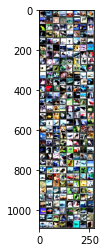

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
#!pip install torchsummary
from torchsummary import summary
#import resnet
from QuizDNN import QModel
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
net = QModel().to(device)
summary(net, input_size=(3, 32, 32))


torch.Size([2, 32, 32, 32])
torch.Size([2, 32, 16, 16])
torch.Size([2, 64, 16, 16])
torch.Size([2, 64, 8, 8])
torch.Size([2, 128, 8, 8])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]              96
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,216
      BatchNorm2d-10           [-1, 32, 32, 32]              64
             ReLU-11           [-1, 32, 32, 32]               0
          Dropout-12          

In [0]:
import torch.optim as optim
import torch.nn as nn
learning_rate = 0.1
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

In [0]:
from tqdm import tqdm
import train_acc_loss as tr 
import test_acc_loss as ts


In [11]:
test_acc = []
train_acc = []
for epoch in range(1, 10):
        learning_rate = my_transform.adjust_learning_rate(learning_rate, epoch)
        epoch_train_acc,epoch_train_loss = tr.train(net, device, trainloader, optimizer, criterion, epoch)        
        epoch_test_acc,epoch_test_loss = ts.test(net, device, testloader,epoch,criterion )

        print('\nEpoch: {:.0f} Train set: Average loss: {:.4f}, Accuracy: {:.3f}%'.format(epoch, epoch_train_loss, epoch_train_acc))
        print('Epoch: {:.0f} Test set: Average loss: {:.4f}, Accuracy: {:.3f}%'.format(epoch, epoch_test_loss, epoch_test_acc))

  1%|          | 1/196 [00:00<01:26,  2.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])

  2%|▏         | 3/196 [00:00<01:04,  2.99it/s]


torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:00<00:39,  4.85it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  5%|▍         | 9/196 [00:01<00:31,  5.99it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:21,  8.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  8%|▊         | 15/196 [00:01<00:19,  9.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:01<00:15, 11.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 11%|█         | 21/196 [00:01<00:14, 11.95it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:13, 12.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 14%|█▍        | 27/196 [00:02<00:13, 12.97it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:12, 13.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 17%|█▋        | 33/196 [00:02<00:12, 13.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:12, 13.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 20%|█▉        | 39/196 [00:03<00:12, 12.90it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:11, 12.92it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 23%|██▎       | 45/196 [00:03<00:11, 12.81it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 12.80it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 26%|██▌       | 51/196 [00:04<00:11, 12.84it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:10, 12.99it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 29%|██▉       | 57/196 [00:04<00:10, 12.99it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:04<00:10, 13.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 32%|███▏      | 63/196 [00:05<00:10, 13.22it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:09, 13.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 35%|███▌      | 69/196 [00:05<00:09, 13.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:05<00:09, 13.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 38%|███▊      | 75/196 [00:06<00:09, 13.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:08, 13.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 41%|████▏     | 81/196 [00:06<00:08, 13.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:06<00:08, 13.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 44%|████▍     | 87/196 [00:06<00:08, 13.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:07, 13.22it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 47%|████▋     | 93/196 [00:07<00:07, 13.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:07<00:07, 13.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 51%|█████     | 99/196 [00:07<00:07, 13.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:06, 13.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 54%|█████▎    | 105/196 [00:08<00:06, 13.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:08<00:06, 13.05it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 57%|█████▋    | 111/196 [00:08<00:06, 13.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 13.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 60%|█████▉    | 117/196 [00:09<00:05, 13.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:09<00:05, 13.07it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 63%|██████▎   | 123/196 [00:09<00:05, 13.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:09<00:05, 13.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 66%|██████▌   | 129/196 [00:10<00:04, 13.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:10<00:04, 13.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 69%|██████▉   | 135/196 [00:10<00:04, 13.11it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:10<00:04, 13.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 72%|███████▏  | 141/196 [00:11<00:04, 13.23it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:11<00:03, 13.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 75%|███████▌  | 147/196 [00:11<00:03, 13.04it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:11<00:03, 13.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 78%|███████▊  | 153/196 [00:11<00:03, 13.67it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:12<00:02, 13.77it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 81%|████████  | 159/196 [00:12<00:02, 13.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:12<00:02, 13.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 84%|████████▍ | 165/196 [00:12<00:02, 13.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:13<00:02, 13.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 87%|████████▋ | 171/196 [00:13<00:01, 13.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:13<00:01, 13.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 90%|█████████ | 177/196 [00:13<00:01, 13.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:13<00:01, 13.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 93%|█████████▎| 183/196 [00:14<00:01, 12.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:14<00:00, 13.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:14<00:00, 13.96it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:14<00:00, 14.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:15<00:00, 13.01it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torc

  1%|          | 1/196 [00:00<01:21,  2.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:47,  4.03it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:00<00:37,  5.04it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:25,  7.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:21,  8.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:17, 10.15it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:01<00:15, 11.15it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:14, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:13, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:13, 12.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:12, 12.92it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:03<00:11, 13.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:11, 13.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:11, 13.78it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:11, 13.85it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:03<00:11, 13.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 13.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:10, 13.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:10, 13.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:04<00:09, 13.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:04<00:09, 13.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:09, 13.78it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:09, 13.89it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:05<00:09, 13.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:05<00:09, 13.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:08, 13.74it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:08, 13.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:06<00:08, 12.77it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:06<00:08, 13.15it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:07<00:08, 12.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 13.04it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:07<00:07, 13.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:07<00:07, 13.81it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:07<00:06, 13.84it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:06, 13.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:08<00:06, 13.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:08<00:06, 13.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:08<00:06, 13.74it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:08<00:05, 13.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:09<00:05, 13.92it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:09<00:05, 13.95it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:09<00:05, 13.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:09<00:05, 13.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:10<00:04, 13.07it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 69%|██████▉   | 135/196 [00:10<00:04, 13.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:10<00:04, 13.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:10<00:04, 13.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:11<00:03, 13.67it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:11<00:03, 13.81it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:11<00:03, 13.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:11<00:03, 13.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:11<00:03, 13.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:12<00:02, 13.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:12<00:02, 13.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:12<00:02, 13.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:12<00:02, 13.88it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:12<00:01, 13.96it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:13<00:01, 13.77it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:13<00:01, 13.84it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:13<00:01, 13.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:13<00:01, 13.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:14<00:00, 13.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:14<00:00, 13.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:14<00:00, 13.75it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 99%|█████████▉| 195/196 [00:14<00:00, 14.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([80, 32, 32, 32])


100%|██████████| 196/196 [00:14<00:00, 13.16it/s]

torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 2 Train set: Average loss: 0

  1%|          | 1/196 [00:00<00:54,  3.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  1%|          | 2/196 [00:00<00:50,  3.86it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 6/196 [00:00<00:31,  5.95it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▍         | 8/196 [00:00<00:26,  7.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 12/196 [00:01<00:19,  9.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 14/196 [00:01<00:17, 10.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▉         | 18/196 [00:01<00:15, 11.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|█         | 20/196 [00:01<00:14, 12.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 24/196 [00:02<00:13, 12.85it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 26/196 [00:02<00:12, 13.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▌        | 30/196 [00:02<00:12, 13.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▋        | 32/196 [00:02<00:12, 13.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 36/196 [00:03<00:12, 13.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 38/196 [00:03<00:11, 13.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██▏       | 42/196 [00:03<00:11, 13.75it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 44/196 [00:03<00:10, 13.85it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 48/196 [00:03<00:10, 13.81it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 26%|██▌       | 50/196 [00:04<00:10, 13.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 54/196 [00:04<00:10, 13.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 29%|██▊       | 56/196 [00:04<00:10, 13.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 60/196 [00:04<00:10, 13.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 32%|███▏      | 62/196 [00:04<00:09, 13.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▎      | 66/196 [00:05<00:09, 13.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 35%|███▍      | 68/196 [00:05<00:09, 13.78it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 72/196 [00:05<00:09, 13.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 38%|███▊      | 74/196 [00:05<00:09, 13.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|███▉      | 78/196 [00:06<00:08, 13.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 41%|████      | 80/196 [00:06<00:08, 13.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 84/196 [00:06<00:08, 13.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 44%|████▍     | 86/196 [00:06<00:07, 13.85it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▌     | 90/196 [00:07<00:08, 13.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 94/196 [00:07<00:07, 13.78it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 96/196 [00:07<00:07, 13.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 50%|█████     | 98/196 [00:07<00:07, 13.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 102/196 [00:07<00:07, 13.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 104/196 [00:08<00:06, 13.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▌    | 108/196 [00:08<00:06, 13.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 110/196 [00:08<00:06, 13.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 114/196 [00:08<00:06, 13.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▉    | 116/196 [00:08<00:05, 13.79it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 120/196 [00:09<00:05, 13.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 122/196 [00:09<00:05, 13.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 126/196 [00:09<00:05, 13.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▌   | 128/196 [00:09<00:05, 13.05it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 132/196 [00:10<00:04, 13.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 134/196 [00:10<00:04, 13.83it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|███████   | 138/196 [00:10<00:04, 13.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████▏  | 140/196 [00:10<00:04, 13.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 144/196 [00:10<00:03, 13.84it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 146/196 [00:11<00:03, 13.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 150/196 [00:11<00:03, 13.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 78%|███████▊  | 152/196 [00:11<00:03, 13.75it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|███████▉  | 156/196 [00:11<00:02, 13.92it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 81%|████████  | 158/196 [00:12<00:02, 13.85it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 162/196 [00:12<00:02, 13.87it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 84%|████████▎ | 164/196 [00:12<00:02, 13.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 168/196 [00:12<00:02, 13.79it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 87%|████████▋ | 170/196 [00:12<00:01, 13.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 174/196 [00:13<00:01, 13.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 90%|████████▉ | 176/196 [00:13<00:01, 13.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 180/196 [00:13<00:01, 13.69it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 93%|█████████▎| 182/196 [00:13<00:01, 13.69it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▍| 186/196 [00:14<00:00, 13.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 96%|█████████▌| 188/196 [00:14<00:00, 12.94it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 192/196 [00:14<00:00, 13.77it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 99%|█████████▉| 194/196 [00:14<00:00, 14.02it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


100%|██████████| 196/196 [00:14<00:00, 13.24it/s]


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 3 Train set: Average loss: 0.0039, Accuracy: 64.310%
Epoch: 3 Test set: Average loss: 0.0041, Accuracy: 62.740%


  1%|          | 1/196 [00:00<01:09,  2.82it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:40,  4.67it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:00<00:33,  5.69it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:23,  7.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:20,  9.01it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:17, 10.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:01<00:15, 11.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:14, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:13, 12.83it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:12, 13.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:12, 13.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:02<00:12, 13.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:11, 13.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:11, 13.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:11, 13.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:03<00:11, 13.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 13.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:10, 13.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:10, 13.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:04<00:09, 13.87it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:04<00:09, 13.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:09, 13.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:09, 13.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:05<00:09, 13.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:05<00:09, 13.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:08, 13.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:08, 13.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:06<00:08, 13.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:06<00:08, 13.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:06<00:08, 13.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:07, 13.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:07<00:07, 13.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:07<00:07, 13.05it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:07<00:07, 13.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:06, 13.64it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:08<00:06, 13.74it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:08<00:06, 13.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:08<00:06, 13.78it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:08<00:05, 13.90it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:09<00:05, 13.76it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:09<00:05, 13.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:09<00:05, 13.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:09<00:05, 13.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:10<00:04, 13.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:10<00:04, 13.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:10<00:04, 13.86it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:10<00:04, 13.78it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:10<00:03, 13.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:11<00:03, 13.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:11<00:03, 13.74it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:11<00:03, 13.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:11<00:02, 13.92it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:11<00:02, 13.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:12<00:02, 13.11it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:12<00:02, 12.99it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:12<00:02, 13.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:12<00:02, 13.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:13<00:01, 13.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:13<00:01, 13.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:13<00:01, 13.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:13<00:01, 13.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:14<00:00, 13.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:14<00:00, 13.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:14<00:00, 13.75it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:14<00:00, 13.92it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:14<00:00, 13.17it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 4 Train set: Average loss: 0.0034, Accuracy: 69.078%
Epoch: 4 Test set: Average loss: 0.0049, Accuracy: 59.910%


  1%|          | 1/196 [00:00<01:15,  2.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:44,  4.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:00<00:35,  5.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:24,  7.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:21,  8.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:16, 10.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:01<00:15, 11.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:13, 12.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:13, 12.64it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:12, 13.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:12, 13.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:02<00:12, 13.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:12, 13.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:11, 13.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:11, 13.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:03<00:11, 13.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:10, 13.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:10, 13.99it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:10, 13.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:04<00:10, 13.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:04<00:09, 13.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:09, 13.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:09, 13.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:05<00:09, 13.02it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:05<00:09, 13.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:09, 12.97it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:08, 13.07it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:06<00:08, 13.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:06<00:08, 13.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:07<00:07, 13.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:07, 13.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:07<00:07, 13.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:07<00:07, 13.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:07<00:07, 13.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 13.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:08<00:06, 13.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:08<00:06, 13.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:08<00:06, 13.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:08<00:06, 13.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:09<00:05, 13.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:09<00:05, 13.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:09<00:05, 13.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:09<00:05, 13.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:10<00:04, 13.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:10<00:04, 13.69it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:10<00:04, 12.95it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:10<00:04, 13.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:11<00:03, 13.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:11<00:03, 13.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:11<00:03, 13.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:11<00:03, 13.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:11<00:02, 13.87it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:12<00:02, 13.79it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:12<00:02, 13.87it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:12<00:02, 13.89it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:12<00:02, 13.87it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:12<00:01, 13.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:13<00:01, 13.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:13<00:01, 13.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:13<00:01, 13.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:13<00:01, 13.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:14<00:00, 13.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:14<00:00, 13.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:14<00:00, 14.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:14<00:00, 14.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:14<00:00, 13.13it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]


Epoch: 5 Train set: Average loss: 0.0031, Accuracy: 72.174%
Epoch: 5 Test set: Average loss: 0.0036, Accuracy: 67.650%


  1%|          | 1/196 [00:00<01:13,  2.64it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:43,  4.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:00<00:35,  5.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:23,  7.75it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:20,  8.76it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:16, 10.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:01<00:15, 11.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:14, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:13, 12.81it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:13, 12.79it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:13, 12.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:03<00:12, 12.79it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:12, 12.91it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:11, 13.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:11, 13.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:03<00:11, 13.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 13.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:10, 13.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:10, 13.64it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:04<00:10, 13.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:04<00:09, 13.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:09, 13.77it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:09, 13.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:05<00:09, 13.17it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:05<00:09, 13.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:08, 13.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:08, 13.75it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:06<00:08, 13.77it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:06<00:08, 13.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:07<00:07, 13.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:07, 13.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:07<00:07, 13.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:07<00:07, 13.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:07<00:06, 13.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:06, 13.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:08<00:06, 13.83it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:08<00:06, 13.81it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:08<00:06, 13.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:08<00:05, 13.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:09<00:05, 13.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:09<00:05, 13.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:09<00:05, 13.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:09<00:05, 13.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:10<00:05, 12.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:10<00:04, 13.10it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:10<00:04, 12.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:10<00:04, 13.03it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:11<00:04, 12.92it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:11<00:03, 12.80it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:11<00:03, 13.11it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:11<00:03, 13.05it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:12<00:03, 13.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:12<00:02, 13.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:12<00:02, 13.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:12<00:02, 13.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:12<00:02, 13.95it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:13<00:01, 13.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:13<00:01, 13.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:13<00:01, 13.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:13<00:01, 13.80it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:13<00:01, 13.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:14<00:00, 13.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:14<00:00, 13.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:14<00:00, 13.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 99%|█████████▉| 195/196 [00:14<00:00, 14.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:14<00:00, 13.07it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]


Epoch: 6 Train set: Average loss: 0.0028, Accuracy: 74.626%
Epoch: 6 Test set: Average loss: 0.0037, Accuracy: 68.880%


  1%|          | 1/196 [00:00<01:20,  2.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:46,  4.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:00<00:36,  5.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:24,  7.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:21,  8.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:17, 10.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:01<00:15, 11.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:14, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:13, 12.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:12, 12.88it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:12, 12.96it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:02<00:12, 13.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:11, 13.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:11, 13.90it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:11, 13.75it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:03<00:11, 13.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:10, 13.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:10, 13.76it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:10, 13.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:04<00:09, 13.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:04<00:09, 13.80it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:09, 13.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:09, 13.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:05<00:09, 13.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:05<00:09, 13.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:08, 13.82it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:08, 13.95it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:06<00:08, 13.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:06<00:08, 13.83it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:06<00:08, 13.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 13.07it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:07<00:07, 13.04it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:07<00:07, 13.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:07<00:07, 13.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 13.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:08<00:06, 13.07it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:08<00:06, 13.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:08<00:06, 13.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:08<00:06, 13.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:09<00:05, 13.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:09<00:05, 12.75it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:09<00:05, 12.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:09<00:05, 13.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:10<00:04, 13.17it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:10<00:04, 13.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:10<00:04, 13.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:10<00:04, 13.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:11<00:03, 13.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:11<00:03, 13.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:11<00:03, 13.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:11<00:03, 13.69it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:11<00:02, 13.84it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:12<00:02, 13.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:12<00:02, 13.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:12<00:02, 13.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:12<00:02, 12.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:13<00:02, 12.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:13<00:01, 12.83it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:13<00:01, 12.67it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:13<00:01, 13.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:13<00:01, 13.15it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:14<00:00, 13.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:14<00:00, 12.96it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:14<00:00, 13.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 99%|█████████▉| 195/196 [00:14<00:00, 13.91it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:15<00:00, 13.04it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 7 Train set: Average loss: 0.0027, Accuracy: 76.294%
Epoch: 7 Test set: Average loss: 0.0033, Accuracy: 71.260%


  1%|          | 1/196 [00:00<01:23,  2.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:47,  4.00it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:00<00:37,  4.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:25,  7.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:21,  8.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:16, 10.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:01<00:15, 11.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:13, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:13, 12.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:13, 12.76it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:12, 13.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:03<00:12, 13.11it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:12, 13.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:11, 13.23it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:11, 13.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:03<00:11, 13.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 13.23it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:11, 12.94it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:10, 13.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:04<00:10, 13.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:04<00:10, 13.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:09, 13.23it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:09, 13.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:05<00:09, 13.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:05<00:09, 12.86it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:08, 13.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:08, 13.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:06<00:08, 13.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:06<00:08, 13.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:07<00:08, 13.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 47%|████▋     | 93/196 [00:07<00:07, 13.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:07<00:07, 13.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:07<00:07, 13.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:07<00:07, 13.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 13.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:08<00:06, 13.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:08<00:06, 13.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:08<00:06, 13.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:08<00:05, 13.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:09<00:05, 13.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:09<00:05, 13.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:09<00:05, 13.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:09<00:05, 13.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:10<00:04, 13.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:10<00:04, 13.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:10<00:04, 13.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:10<00:04, 13.83it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:11<00:03, 13.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:11<00:03, 13.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:11<00:03, 13.87it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:11<00:03, 13.79it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:11<00:02, 13.67it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:12<00:02, 13.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:12<00:02, 13.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:12<00:02, 13.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:12<00:02, 13.74it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:12<00:01, 13.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:13<00:01, 13.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:13<00:01, 13.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:13<00:01, 13.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:13<00:01, 13.05it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:14<00:00, 12.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:14<00:00, 12.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:14<00:00, 13.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 99%|█████████▉| 195/196 [00:14<00:00, 14.22it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([80, 32, 32, 32])

100%|██████████| 196/196 [00:14<00:00, 13.09it/s]


torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 8 Train set: Average loss: 0.0025, Accuracy: 77.466%
Epoch: 8 Test set: Average loss: 0.0030, Accuracy: 74.350%


  1%|          | 1/196 [00:00<00:54,  3.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  2%|▏         | 4/196 [00:00<00:38,  5.03it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 6/196 [00:00<00:31,  6.10it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  5%|▌         | 10/196 [00:01<00:22,  8.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 12/196 [00:01<00:19,  9.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  8%|▊         | 16/196 [00:01<00:15, 11.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▉         | 18/196 [00:01<00:15, 11.67it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 11%|█         | 22/196 [00:01<00:14, 12.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 24/196 [00:02<00:13, 12.85it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 14%|█▍        | 28/196 [00:02<00:12, 13.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▌        | 30/196 [00:02<00:12, 13.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 17%|█▋        | 34/196 [00:02<00:12, 13.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 36/196 [00:03<00:11, 13.74it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 20%|██        | 40/196 [00:03<00:11, 13.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██▏       | 42/196 [00:03<00:11, 13.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 23%|██▎       | 46/196 [00:03<00:11, 13.23it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 48/196 [00:03<00:11, 13.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 52/196 [00:04<00:10, 13.80it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 54/196 [00:04<00:10, 13.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|██▉       | 58/196 [00:04<00:09, 13.81it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 60/196 [00:04<00:09, 13.87it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 64/196 [00:05<00:09, 13.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▎      | 66/196 [00:05<00:09, 13.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 70/196 [00:05<00:09, 13.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 72/196 [00:05<00:09, 13.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 76/196 [00:05<00:08, 13.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|███▉      | 78/196 [00:06<00:08, 13.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 82/196 [00:06<00:08, 13.91it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 84/196 [00:06<00:08, 13.77it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▍     | 88/196 [00:06<00:08, 13.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▌     | 90/196 [00:07<00:08, 12.94it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 94/196 [00:07<00:07, 13.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 96/196 [00:07<00:07, 13.02it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 51%|█████     | 100/196 [00:07<00:07, 13.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 102/196 [00:07<00:06, 13.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 54%|█████▍    | 106/196 [00:08<00:06, 13.17it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▌    | 108/196 [00:08<00:06, 13.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 57%|█████▋    | 112/196 [00:08<00:06, 13.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 114/196 [00:08<00:06, 13.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 60%|██████    | 118/196 [00:09<00:05, 13.00it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 120/196 [00:09<00:05, 13.22it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 63%|██████▎   | 124/196 [00:09<00:05, 13.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 126/196 [00:09<00:05, 13.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 66%|██████▋   | 130/196 [00:10<00:04, 13.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 132/196 [00:10<00:04, 13.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 69%|██████▉   | 136/196 [00:10<00:04, 13.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|███████   | 138/196 [00:10<00:04, 13.90it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 72%|███████▏  | 142/196 [00:10<00:03, 13.95it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 144/196 [00:11<00:03, 13.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 148/196 [00:11<00:03, 13.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 150/196 [00:11<00:03, 13.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▊  | 154/196 [00:11<00:03, 13.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|███████▉  | 156/196 [00:11<00:02, 13.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 160/196 [00:12<00:02, 13.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 162/196 [00:12<00:02, 13.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▍ | 166/196 [00:12<00:02, 13.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 168/196 [00:12<00:02, 13.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 172/196 [00:13<00:01, 13.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 174/196 [00:13<00:01, 12.87it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████ | 178/196 [00:13<00:01, 13.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 180/196 [00:13<00:01, 12.96it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 184/196 [00:14<00:00, 13.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▍| 186/196 [00:14<00:00, 13.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 190/196 [00:14<00:00, 13.75it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 99%|█████████▉| 194/196 [00:14<00:00, 14.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:14<00:00, 13.17it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    cat  ship  ship plane


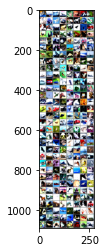

In [12]:
dataiter = iter(testloader)
images, labels = dataiter.next()
#images, labels = images.to(device), labels.to(device)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [13]:
images, labels = images.to(device), labels.to(device)
outputs = net(images)

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


In [14]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [15]:
ts.test_category_wise(net, device, testloader, classes)

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
